In [1]:
import os
import matplotlib.pyplot as plt
import csv
import pickle
import math

# Don't edit
done_load=0
load_dest=""

In [2]:
import time

def deleteDB(db='ycsb', host='vmtest3.westus.cloudapp.azure.com:27017', mongo_dir=r"C:\Program Files\MongoDB\Server\3.6\bin"):
    curr_dir=os.getcwd()
    os.chdir(mongo_dir)
    status = os.system(r'mongo ycsb --host "' + host + '" --eval "db.usertable.remove({})"')
    os.chdir(curr_dir)
    return status

def deleteDBMongo():
    deleteDB(host='vmtest3.westus.cloudapp.azure.com:27017')
    
def deleteDBAtlas():
    deleteDB(host='vmtest3.westus.cloudapp.azure.com:27017')    
    
def deleteDBCosmos(mongo_dir=r"C:\Program Files\MongoDB\Server\3.6\bin"):
    curr_dir=os.getcwd()
    os.chdir(mongo_dir)
    u=r"mongo-api-benchmark"
    p=r"KiYRdcJp41NN268oTcyeM2ilpLwYUAo8tsX9sYoBNTd6DzjXuJHtcaSylh5VJNGs2wg1FVGExRC0m5Z6pEk7ow=="
    host=r"mongo-api-benchmark.mongo.cosmos.azure.com:10255"
    run_str=r'mongo ycsb --host ' + host + r' -u ' + u + r' -p ' + p + r' --ssl --eval "db.usertable.remove({})"'
    status = os.system(run_str)
    os.chdir(curr_dir)
    time.sleep(2)
    
    return status    
#    deleteDB(host=r'mongo-api-benchmark:KiYRdcJp41NN268oTcyeM2ilpLwYUAo8tsX9sYoBNTd6DzjXuJHtcaSylh5VJNGs2wg1FVGExRC0m5Z6pEk7ow^=^=@mongo-api-benchmark.mongo.cosmos.azure.com:10255/?ssl^=true^&replicaSet^=globaldb^&retrywrites^=false^&maxIdleTimeMS^=120000^&appName^=@mongo-api-benchmark@')
#    deleteDB(host=r'mongo-api-benchmark:KiYRdcJp41NN268oTcyeM2ilpLwYUAo8tsX9sYoBNTd6DzjXuJHtcaSylh5VJNGs2wg1FVGExRC0m5Z6pEk7ow==@mongo-api-benchmark.mongo.cosmos.azure.com:10255/?ssl=true&replicaSet=globaldb&retrywrites=false&maxIdleTimeMS=120000&appName=@mongo-api-benchmark@')

In [3]:
def runYCSB(cmd="run", ycsb_dir=r'C:\Users\anfeldma\codeHome\YCSB\bin',workload_dir=r'C:\Users\anfeldma\codeHome\YCSB\workloads',workload='workloadw', \
            mongo_endpoint=r'mongodb://vmtest3.westus.cloudapp.azure.com:27017/',operation_count=1000, \
            nthreads=1,logdir=".\\",logfn="log.csv"):
    
    curr_dir=os.getcwd()
    os.chdir(ycsb_dir)
    ycsb_str=r'ycsb ' + cmd + ' mongodb -s -P "' + workload_dir + "\\" + workload + r'" -p mongodb.url="' + mongo_endpoint + \
            r'" -p operationcount=' + str(operation_count) + r' -p recordcount=' + str(operation_count) + r' -threads ' + str(nthreads) + \
            r" " + \
            ' > ' + logdir + logfn
    print(ycsb_str)
    #status=0
    os.system(ycsb_str)
    os.chdir(curr_dir)
    return ycsb_str

def runYCSBMongo36(execmd="run", op_count=10000, nthr=1, wkld="workloadw"):
    return runYCSB(cmd=execmd, operation_count=op_count, nthreads=nthr, workload=wkld)

def runYCSBCosmos36(execmd="run", op_count=10000, nthr=1, wkld="workloadw"):
    return runYCSB(cmd=execmd, mongo_endpoint=r'mongodb://mongo-api-benchmark:KiYRdcJp41NN268oTcyeM2ilpLwYUAo8tsX9sYoBNTd6DzjXuJHtcaSylh5VJNGs2wg1FVGExRC0m5Z6pEk7ow^=^=@mongo-api-benchmark.mongo.cosmos.azure.com:10255/?ssl^=true^&replicaSet^=globaldb^&retrywrites^=false^&maxIdleTimeMS^=120000^&appName^=@mongo-api-benchmark@', \
                   operation_count=op_count, nthreads=nthr, workload=wkld)

def runYCSBAtlas36(execmd="run", op_count=10000, nthr=1, wkld="workloadw"):
    return runYCSB(cmd=execmd, mongo_endpoint=r'mongodb://vmtest3.westus.cloudapp.azure.com:27017', \
                   operation_count=op_count, nthreads=nthr, workload=wkld)

In [4]:
def parseLog(logdir=r'C:\Users\anfeldma\codeHome\YCSB\bin', logfn='log.csv'):
    metrics_dict={}
    with open(logdir + '\\' + logfn, newline='') as csvfile:
        csvrdr = csv.reader(csvfile)#csv.reader(csvfile, delimiter='', quotechar='|')
        for row in csvrdr:
            if len(row) > 0 and row[0][0] == "[":
                arg0 = row[0].lstrip().rstrip()
                arg1 = row[1].lstrip().rstrip()
                met_val = row[2].lstrip().rstrip()
                if not(arg0 in metrics_dict):
                    metrics_dict[arg0] = {}
                metrics_dict[arg0][arg1] = float(met_val)

    return metrics_dict

In [5]:
def getIndividualMetrics(met_thrpt_dict_array):
    # Plot response curve
    thrpt_list=[]
    metric_list=[]
    max_thrpt=0

    for idx in range(len(met_thrpt_dict_array)):
        thrpt_list.append(met_thrpt_dict_array[idx][rt_thrpt_field][thrpt_field])
        metric_list.append(met_thrpt_dict_array[idx][optype_field][metric_field])
    
    return thrpt_list, metric_list, max_thrpt

In [6]:
def plotResponseCurve(thrpt_list, metric_list, max_thrpt, optype_field):
    
    plt.plot(thrpt_list, metric_list, marker="x")
    ax = plt.gca()

    for idx in range(len(met_thrpt_dict_array)):
        ax.annotate(str(thrpt_list[idx]),
        xy=(thrpt_list[idx], metric_list[idx]))
    
    plt.grid(True)
    plt.title(optype_field)
    plt.xlabel(thrpt_field)
    plt.ylabel(metric_field)
    fig=plt.gcf()
    plt.show()
    return fig

In [7]:
def saveResult(met_thrpt_dict_array,thrpt_list,metric_list,nthread_list,max_thrpt,optype_field,ycsb_str,fig):
    print("Making " + optype_field + " dir.")
    os.makedirs(optype_field, exist_ok=True)
    print("Saving result data...")
    dumpObj={}
    with open(optype_field + "\\pickle.obj", "wb") as fileObj:
        dumpObj["met_thrpt_dict_array"]=met_thrpt_dict_array
        dumpObj["thrpt_list"]=thrpt_list
        dumpObj["metric_list"]=metric_list
        dumpObj["nthread_list"]=nthread_list
        dumpObj["max_thrpt"]=max_thrpt
        dumpObj["optype_field"]=optype_field
        dumpObj["ycsb_str"]=max_thrpt
        pickle.dump(dumpObj,fileObj)
    print("Saving plot...")
    fig.savefig(optype_field + "\\" + optype_field + ".png")

In [8]:
def saveComparison(op_max_rate):
    print("Making " + "ycsb_op_comparison" + " dir.")
    os.makedirs("ycsb_op_comparison", exist_ok=True)
    print("Saving comparison data...")   
    dumpObj={}
    with open(optype_field + "\\pickle.obj", "wb") as fileObj:
        dumpObj["op_max_rate"]=op_max_rate
        pickle.dump(dumpObj,fileObj)    

In [9]:
op_mapping={"insert":{"optype_field":"[INSERT]","workload_name":"workloadw"}, \
            "read":{"optype_field":"[READ]","workload_name":"workloadr"}, \
            "update":{"optype_field":"[UPDATE]","workload_name":"workloadu"} \
           }


db_type="cosmos" #"cosmos", "mongo", "atlas"
rt_thrpt_field="[OVERALL]"
rt_field="RunTime(ms)"
thrpt_field="Throughput(ops/sec)"
ops_list=["insert"] #["insert","read","update"]
opname="read"
optype_field=op_mapping[opname]["optype_field"]
workload_name=op_mapping[opname]["workload_name"]
metric_field="99thPercentileLatency(us)"
doc_count=1000
nthread_list=[1,2,5,10,20,50,64,100]

Starting YCSB cosmos run, opname insert, workload workloadw, thread count 1
Done deleting existing YCSB dataset.
ycsb run mongodb -s -P "C:\Users\anfeldma\codeHome\YCSB\workloads\workloadw" -p mongodb.url="mongodb://mongo-api-benchmark:KiYRdcJp41NN268oTcyeM2ilpLwYUAo8tsX9sYoBNTd6DzjXuJHtcaSylh5VJNGs2wg1FVGExRC0m5Z6pEk7ow^=^=@mongo-api-benchmark.mongo.cosmos.azure.com:10255/?ssl^=true^&replicaSet^=globaldb^&retrywrites^=false^&maxIdleTimeMS^=120000^&appName^=@mongo-api-benchmark@" -p operationcount=1000 -p recordcount=1000 -threads 1  > .\log.csv
Finished YCSB run, thread count 1
Starting YCSB cosmos run, opname insert, workload workloadw, thread count 2
Done deleting existing YCSB dataset.
ycsb run mongodb -s -P "C:\Users\anfeldma\codeHome\YCSB\workloads\workloadw" -p mongodb.url="mongodb://mongo-api-benchmark:KiYRdcJp41NN268oTcyeM2ilpLwYUAo8tsX9sYoBNTd6DzjXuJHtcaSylh5VJNGs2wg1FVGExRC0m5Z6pEk7ow^=^=@mongo-api-benchmark.mongo.cosmos.azure.com:10255/?ssl^=true^&replicaSet^=globaldb^&retr

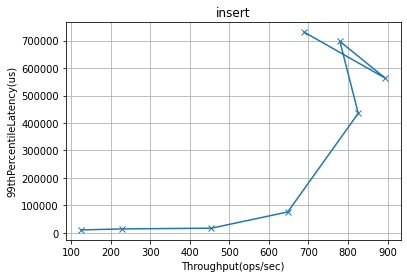

Making [INSERT] dir.
Saving result data...
Saving plot...
Max throughput: 894.4543828264758
Making ycsb_op_comparison dir.
Saving comparison data...
{'insert': 894.4543828264758}


In [10]:
met_thrpt_dict_array = []    

os.chdir(r"C:\Users\anfeldma\codeHome\YCSB")

op_max_rate={}
    
for jdx in range(len(ops_list)):
    opname = ops_list[jdx]
    optype_field=op_mapping[opname]["optype_field"]
    workload_name=op_mapping[opname]["workload_name"]
    
    if opname != "insert":
        if done_load>=doc_count and load_dest==db_type:
            print("Already loaded data.")
        else:
            print("Starting YCSB load using max thread count...")
            runYCSBMongo36(execmd="load",op_count=doc_count, nthr=max(nthread_list), wkld=workload_name)
            done_load=doc_count
            load_dest=db_type
            print("Finished YCSB load.")        
    
    for idx in range(len(nthread_list)):
        print("Starting YCSB " + db_type + " run, opname " + opname + ", workload " + workload_name +  ", thread count " + str(nthread_list[idx]))
        if opname=="insert":
            if db_type=="mongo":
                deleteDBMongo()
            elif db_type=="atlas":
                deleteDBAtlas()
            elif db_type=="cosmos":
                deleteDBCosmos()
                
            print("Done deleting existing YCSB dataset.")
                
            done_load=0
        if db_type=="mongo":
            ycsb_str=runYCSBMongo36(op_count=doc_count, nthr=nthread_list[idx], wkld=workload_name)
        elif db_type=="atlas":
            ycsb_str=runYCSBAtlas36(op_count=doc_count, nthr=nthread_list[idx], wkld=workload_name)
        elif db_type=="cosmos":
            ycsb_str=runYCSBCosmos36(op_count=doc_count, nthr=nthread_list[idx], wkld=workload_name)
            
        met_thrpt_dict_array.append(parseLog())
        print("Finished YCSB run, thread count " + str(nthread_list[idx]))
        
    thrpt_list, metric_list, max_thrpt = getIndividualMetrics(met_thrpt_dict_array)
    max_thrpt=max(thrpt_list)
    met_thrpt_dict_array=[]
    fig=plotResponseCurve(thrpt_list, metric_list, max_thrpt, opname)
    saveResult(met_thrpt_dict_array,thrpt_list,metric_list,nthread_list,max_thrpt,optype_field,ycsb_str,fig)
    
    print("Max throughput: " + str(max_thrpt))
    op_max_rate[opname]=max_thrpt
    
saveComparison(op_max_rate)
print(op_max_rate)

<BarContainer object of 1 artists>

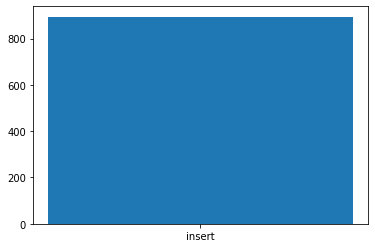

In [11]:
plt.bar(op_max_rate.keys(),op_max_rate.values())

In [12]:
os.getcwd()

'C:\\Users\\anfeldma\\codeHome\\YCSB'

In [14]:
print(met_thrpt_dict_array)

[]
